# simple convolution network

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.3714
                : 10. 正答率(テスト) = 0.409
Generation: 20. 正答率(トレーニング) = 0.6816
                : 20. 正答率(テスト) = 0.647
Generation: 30. 正答率(トレーニング) = 0.7554
                : 30. 正答率(テスト) = 0.725
Generation: 40. 正答率(トレーニング) = 0.7948
                : 40. 正答率(テスト) = 0.75
Generation: 50. 正答率(トレーニング) = 0.836
                : 50. 正答率(テスト) = 0.803
Generation: 60. 正答率(トレーニング) = 0.86
                : 60. 正答率(テスト) = 0.842
Generation: 70. 正答率(トレーニング) = 0.8748
                : 70. 正答率(テスト) = 0.858
Generation: 80. 正答率(トレーニング) = 0.8756
                : 80. 正答率(テスト) = 0.845
Generation: 90. 正答率(トレーニング) = 0.8842
                : 90. 正答率(テスト) = 0.844
Generation: 100. 正答率(トレーニング) = 0.8836
                : 100. 正答率(テスト) = 0.85
Generation: 110. 正答率(トレーニング) = 0.9014
                : 110. 正答率(テスト) = 0.867
Generation: 120. 正答率(トレーニング) = 0.902
                : 120. 正答率(テスト) = 0.864
Generation: 130. 正答率(トレーニング) = 0.8984
                : 130. 正答率(テスト) = 0.864


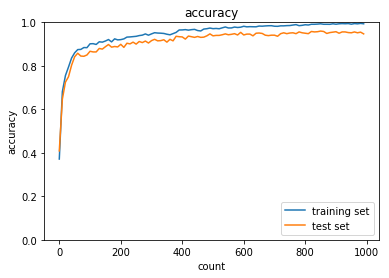

In [2]:
import sys, os
sys.path.append(os.pardir)
import pickle
import numpy as np
from collections import OrderedDict
from common import layers
from common import optimizer
from data.mnist import load_mnist
import matplotlib.pyplot as plt
from common import optimizer


# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(flatten=False)

print("データ読み込み完了")

# 処理に時間のかかる場合はデータを削減 
x_train, d_train = x_train[:5000], d_train[:5000]
x_test, d_test = x_test[:1000], d_test[:1000]

#CNN(sinmple)を設定(layers.pyにクラス定義されている)
network = layers.SimpleConvNet(input_dim=(1,28,28), conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)

optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10



for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]
    
    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)

    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()
